In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [34]:
# Read in the data.
df = pd.read_csv('ambiguous_lightning_data.csv')
df.head(5)

,date,number_of_strikes,center_point_geom
0,2019-08-02,48,POINT(-121.05 30.25)
1,2016-08-16,9,POINT(-53.38 18.59)
2,2016-02-21,65,POINT(-55.24 33.00)
3,2020-02-27,83,POINT(-81.04 28.09)
4,2017-07-17,44,POINT(-106.33 15.29)


In [35]:
# Convert the `date` column to datetime.
df['date'] = pd.to_datetime(df['date'])

In [42]:
df['week'] = df['date'].dt.strftime('%Y-W%V')
df.head()
df['month'] = df['date'].dt.strftime('%Y-%m')
# df.head()
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
# df.head()
df['year'] = df['date'].dt.strftime('%Y')
df.head()


,date,number_of_strikes,center_point_geom,week,month,quarter,year
0,2019-08-02,48,POINT(-121.05 30.25),2019-W31,2019-08,2019-Q3,2019
1,2016-08-16,9,POINT(-53.38 18.59),2016-W33,2016-08,2016-Q3,2016
2,2016-02-21,65,POINT(-55.24 33.00),2016-W07,2016-02,2016-Q1,2016
3,2020-02-27,83,POINT(-81.04 28.09),2020-W09,2020-02,2020-Q1,2020
4,2017-07-17,44,POINT(-106.33 15.29),2017-W29,2017-07,2017-Q3,2017


In [45]:
# Create a new dataframe view of just 2018 data, summed by week.
df_by_week_2018 = df[df['year'] == '2018'].groupby(['week'])['number_of_strikes'].sum().reset_index()
df_by_week_2018.head()

,week,number_of_strikes
0,2018-W01,114
1,2018-W02,204
2,2018-W03,143
3,2018-W04,208
4,2018-W05,45


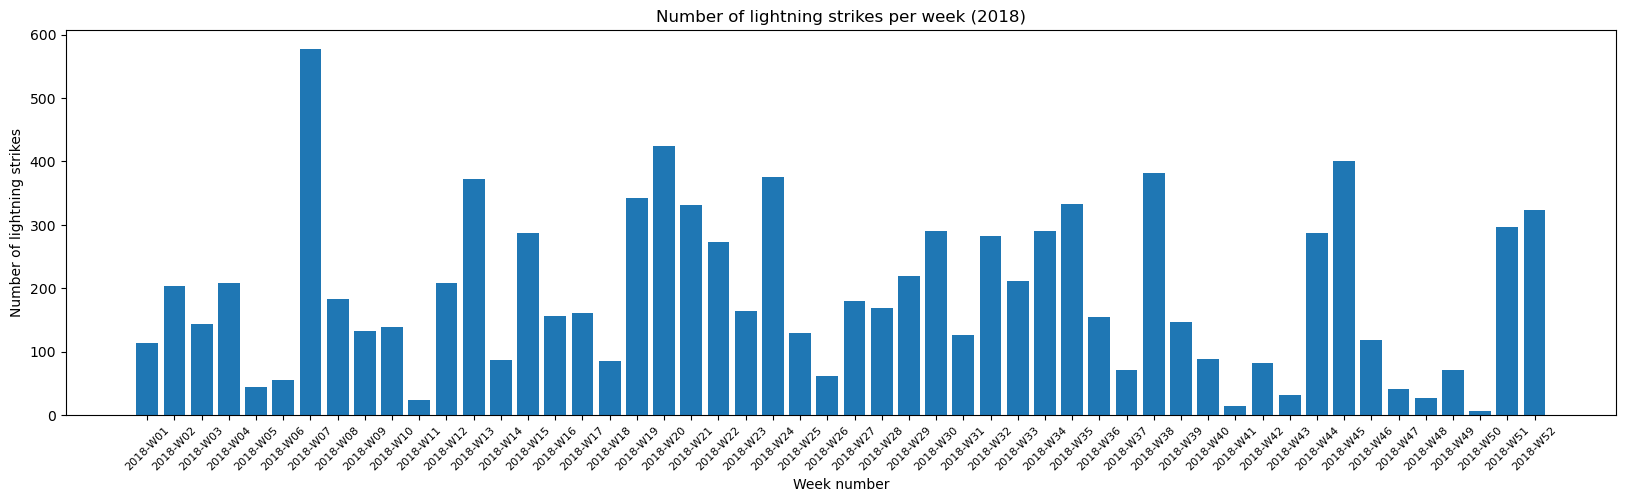

In [47]:
# Plot a bar graph of weekly strike totals in 2018.
plt.figure(figsize = (20, 5)) # Increase output size.
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)")
plt.xticks(rotation = 45, fontsize = 8) # Rotate x-axis labels and decrease font size.

plt.show()

In [52]:
df_by_quarter = df['number_of_strikes'].div(10)
df_by_quarter.head()

0    4.8
1    0.9
2    6.5
3    8.3
4    4.4
Name: number_of_strikes, dtype: float64

In [56]:
df_by_quarter = df.groupby(['quarter'])['number_of_strikes'].sum().reset_index()
# Format as text, in Thousands.
df_by_quarter['number_of_strikes_formatted'] = df_by_quarter['number_of_strikes'].div(1000).round(1).astype(str) + 'K'

df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted
0,2016-Q1,2376,2.4K
1,2016-Q2,2679,2.7K
2,2016-Q3,2790,2.8K
3,2016-Q4,2326,2.3K
4,2017-Q1,2620,2.6K


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '2016-Q1'),
  Text(1, 0, '2016-Q2'),
  Text(2, 0, '2016-Q3'),
  Text(3, 0, '2016-Q4'),
  Text(4, 0, '2017-Q1'),
  Text(5, 0, '2017-Q2'),
  Text(6, 0, '2017-Q3'),
  Text(7, 0, '2017-Q4'),
  Text(8, 0, '2018-Q1'),
  Text(9, 0, '2018-Q2'),
  Text(10, 0, '2018-Q3'),
  Text(11, 0, '2018-Q4'),
  Text(12, 0, '2019-Q1'),
  Text(13, 0, '2019-Q2'),
  Text(14, 0, '2019-Q3'),
  Text(15, 0, '2019-Q4'),
  Text(16, 0, '2020-Q1'),
  Text(17, 0, '2020-Q2'),
  Text(18, 0, '2020-Q3'),
  Text(19, 0, '2020-Q4')])

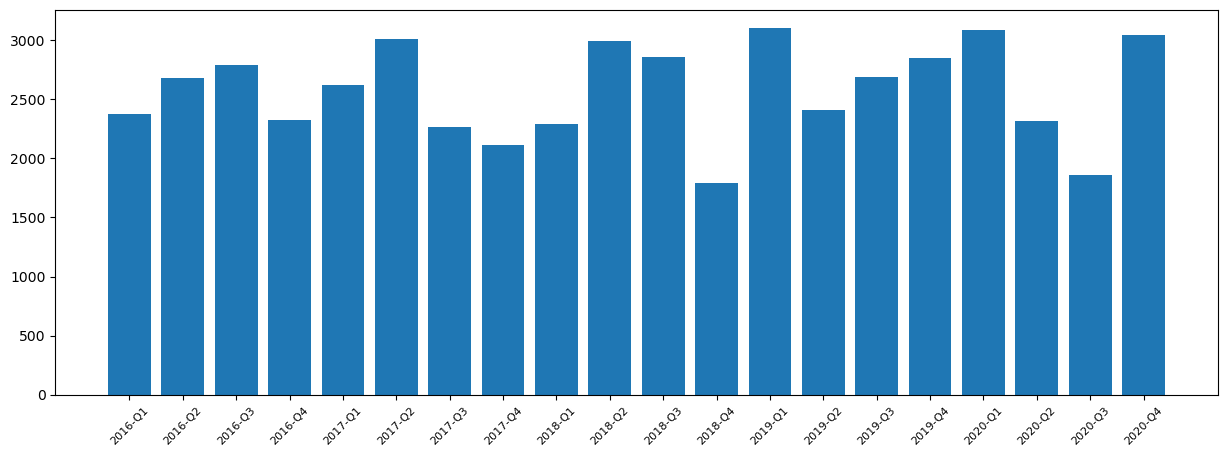

In [63]:
plt.figure(figsize = (15,5))
plt.bar(x = df_by_quarter['quarter'], height = df_by_quarter['number_of_strikes'])
plt.plot()
plt.xticks(rotation = 45, fontsize = 8)

In [64]:
def addlabels(x, y, labels):
    '''
    Iterates over data and plots text labels above each bar of bar graph.
    '''
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')

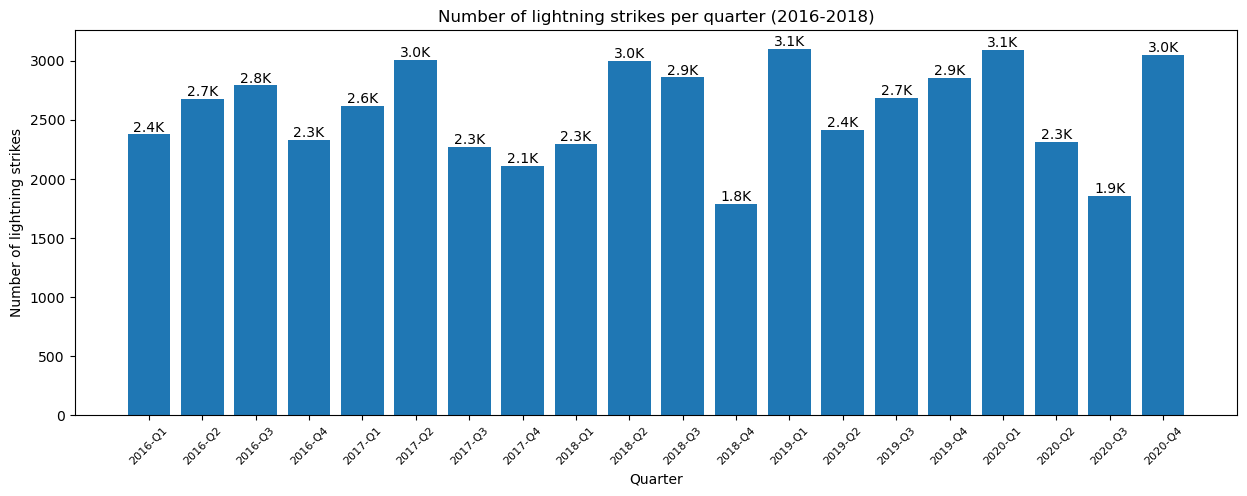

In [66]:
plt.figure(figsize = (15, 5))
plt.bar(x = df_by_quarter['quarter'], height = df_by_quarter['number_of_strikes'])
addlabels(df_by_quarter['quarter'], df_by_quarter['number_of_strikes'], df_by_quarter['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('Quarter')
plt.ylabel('Number of lightning strikes')
plt.title('Number of lightning strikes per quarter (2016-2018)')
plt.xticks(rotation = 45, fontsize = 8)
plt.show()

In [68]:
df_by_quarter['quarter_number'] = df_by_quarter['quarter'].str[-2:]
df_by_quarter['year'] = df_by_quarter['quarter'].str[:4]
df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted,quarter_number,year
0,2016-Q1,2376,2.4K,Q1,2016
1,2016-Q2,2679,2.7K,Q2,2016
2,2016-Q3,2790,2.8K,Q3,2016
3,2016-Q4,2326,2.3K,Q4,2016
4,2017-Q1,2620,2.6K,Q1,2017


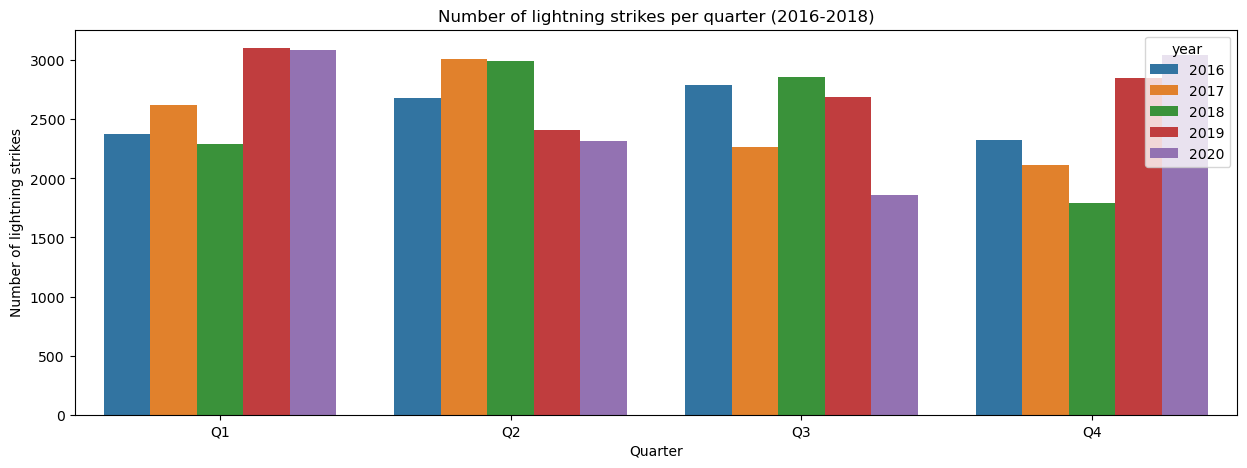

In [71]:
plt.figure(figsize = (15, 5))
p = sns.barplot(
    data = df_by_quarter,
    x = 'quarter_number',
    y = 'number_of_strikes',
    hue = 'year')
for b in p.patches:
    p.annotate(str(round(b.get_height()/1000, 1))+'K', 
                   (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6), 
                   ha = 'center', va = 'bottom', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Quarter")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per quarter (2016-2018)")
plt.show()